### Esercitazione 7 - SAR (Stop And Reverse)
#### Argomenti

* SAR parabolico
* TA-Lib

Il SAR Parabolico è un indicatore di trend calcolato secondo la seguente formula:

__RPSAR = PSAR precedente + [AF * (EP precedente - PSAR prec.)]__

__FPSAR = PSAR precedente − [AF * (PSAR precedente - EP prec.)]__

dove:
* __PSAR__ = Parabolic Stop And Reverse
* __EP__ = Extreme Point (il minimo LOW in un trend decrescente o il massimo HIGH in un trend crescente)
* __RPSAR__ = Rising PSAR - su trend rialzista
* __FPSAR__ = Falling PSAR - su trend ribassista
* __AF__ = Acceleration Factor (inizializzato a 0.02 e incrementato di 0.02 fino a un massimo di 0.2 ad ogni EP incontrato)

Monitorare il prezzo per almeno cinque candele, registrando il massimo e il minimo livello di prezzo incontrato (EP).
Se il prezzo è in aumento, utilizzare il minimo più basso come valore "PSAR precedente" iniziale.
Se il prezzo è in calo, utilizzare il massimo più alto come valore PSAR precedente iniziale.
Utilizzare inizialmente un AF pari a 0.02 e aumentare di 0.02 per ogni nuovo EP trovato. Il valore massimo di default
per AF è 0.2    
E' generalmente rappresentato con una linea puntinata nei grafici di analisi tecnica. Un punto sotto il prezzo attuale
indica un trend rialzista, sotto indica un trend ribassista. Quando la posizione dei punti si inverte, questo
indicatore evidenzia un potenziale cambio di trend nello strumento finanziario osservato.    
    
Un suo uso tipico è per impostare uno stop-loss dinamico che segua il prezzo e permetta di uscire da una posizione al
rilevamento di un possibile cambio di trend.    
E' spesso utilizzato insieme ad altri indicatori di analisi tecnica che lo completano, in particolare per validare il
trend espresso dal SAR, con il fine di evitare falsi segnali.

In [1]:
from Historic_Crypto import  HistoricalData
from datetime import datetime, timedelta
import talib
import mplfinance as mpf

In [2]:
end_date = datetime.now()
start_date = end_date - timedelta(days=10)
candles = HistoricalData(
    ticker='ETH-EUR',
    granularity=3600,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

In [3]:
candles['sar'] = talib.SAR(candles['high'], candles['low'], acceleration=0.02, maximum=0.2)

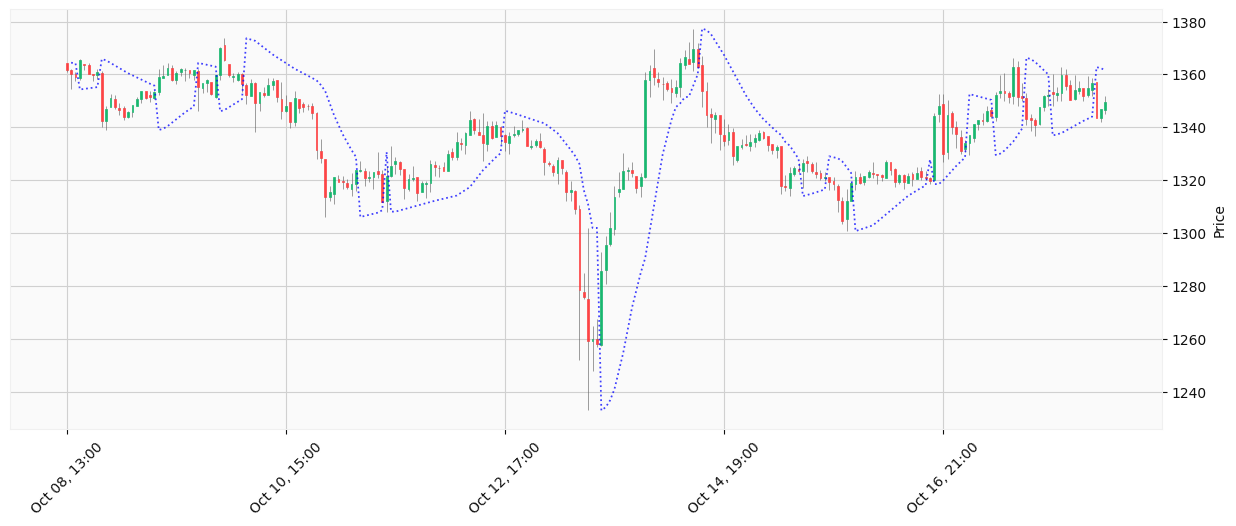

In [4]:
sar_plot = mpf.make_addplot(candles['sar'][:350], linestyle='dotted', alpha=0.75, color='blue')
mpf.plot(candles[:350], addplot=sar_plot, type='candle', style='yahoo', figsize=(16, 6))

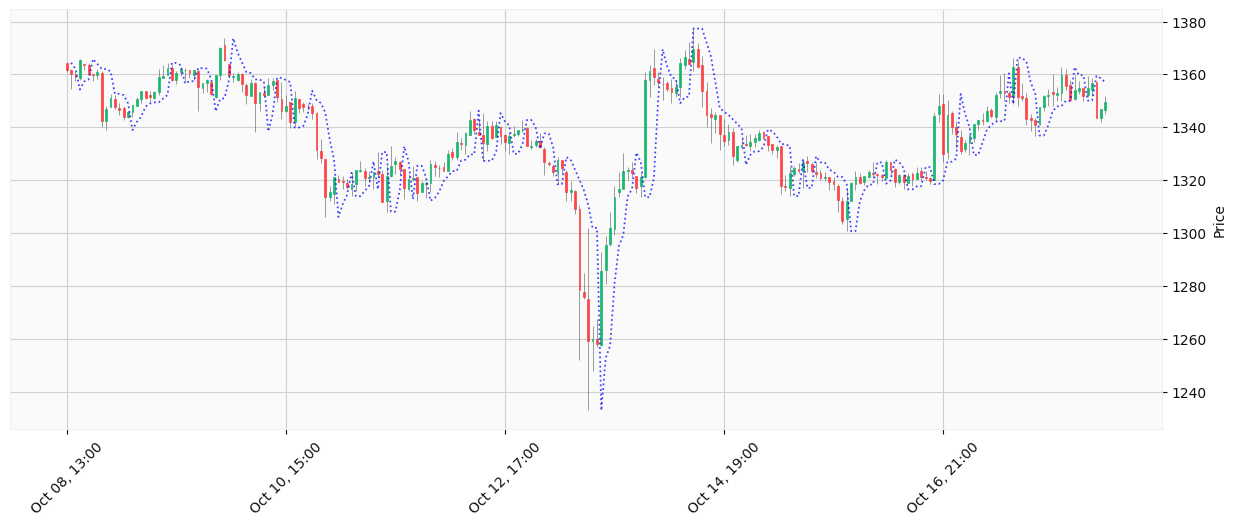

In [5]:
candles['sar_2'] = talib.SAR(candles['high'], candles['low'], acceleration=0.33, maximum=1)
sar_plot = mpf.make_addplot(candles['sar_2'][:350], linestyle='dotted', alpha=0.75, color='blue')
mpf.plot(candles[:350], addplot=sar_plot, type='candle', style='yahoo', figsize=(16, 6))

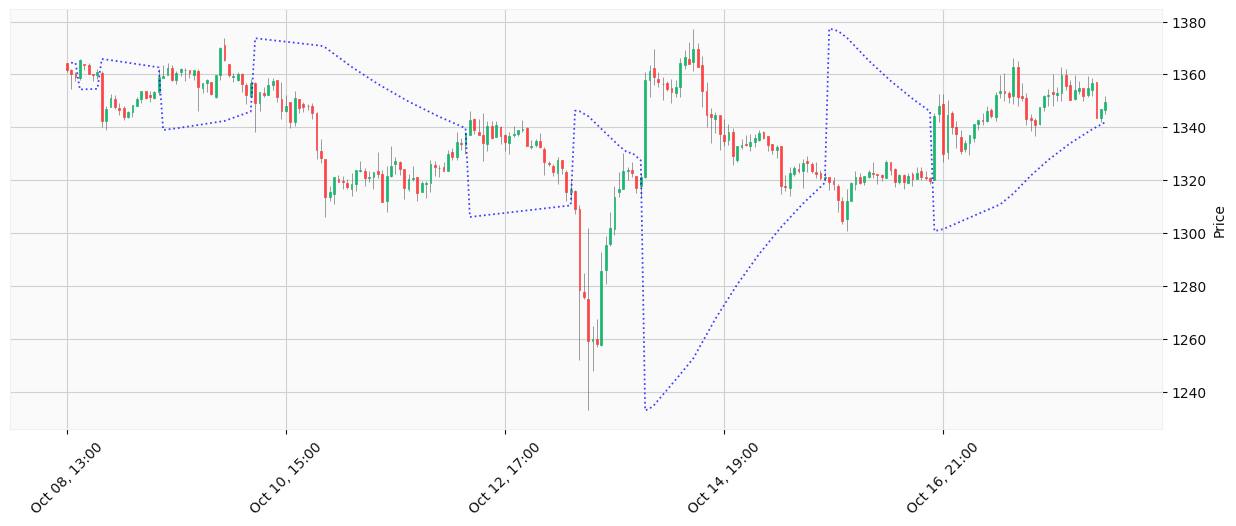

In [6]:
candles['sar_3'] = talib.SAR(candles['high'], candles['low'], acceleration=0.005, maximum=0.05)
sar_plot = mpf.make_addplot(candles['sar_3'][:350], linestyle='dotted', alpha=0.75, color='blue')
mpf.plot(candles[:350], addplot=sar_plot, type='candle', style='yahoo', figsize=(16, 6))